<h1>Project 12</h1>

<h2>Flight Price Prediction</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

We have training and testing data separately in this project, we also have the target variable values for the test set in separate dataset, which we will use to compare our predicted answers and see how well our models work

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in xlsx format***

In [2]:
df=pd.read_excel('Data_Train.xlsx',parse_dates=["Date_of_Journey"])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
x_test=pd.read_excel('Data_Test.xlsx',parse_dates=["Date_of_Journey"])
x_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
y_test=pd.read_excel('Sample_submission.xlsx')
y_test.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


***Checking number of rows and columns***

In [5]:
df.shape

(10683, 11)

In [6]:
x_test.shape

(2671, 10)

In [7]:
y_test.shape

(2671, 1)

***Lets check if there are any missing values in our dataset***

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [9]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   object        
 6   Arrival_Time     2671 non-null   object        
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 208.8+ KB


In [10]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   2671 non-null   int64
dtypes: int64(1)
memory usage: 21.0 KB


**We can observe that there are no missing values**

***Lets analyse our data further***

***Separating columns with object datatype***

In [11]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


***Checking the number of counts of each unique value for all columns***

In [12]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [14]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [15]:
df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → BLR → CCU → BBI → HYD       1
BOM → JLR → HYD                   1
BLR → BOM → IXC → DEL             1
BLR → HBX → BOM → AMD → DEL       1
BLR → HBX → BOM → NAG → DEL       1
Name: Route, Length: 128, dtype: int64

In [16]:
df['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
21:40      1
22:25      1
01:35      1
12:05      1
04:15      1
Name: Dep_Time, Length: 222, dtype: int64

In [17]:
df['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
02:20 04 Jun      1
07:10 04 Mar      1
18:30 13 May      1
22:35 16 May      1
02:20 13 Jun      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [18]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
27h 55m      1
42h 5m       1
30h 10m      1
35h 35m      1
47h          1
Name: Duration, Length: 368, dtype: int64

In [19]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

***Separting the date, month and year so that we can further analyse, and drop the year since it is all for year 2019***

In [21]:
df['year']= df['Date_of_Journey'].dt.year
df['month']= df['Date_of_Journey'].dt.month
df['day']= df['Date_of_Journey'].dt.day
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [22]:
df['year'].value_counts()

2019    10683
Name: year, dtype: int64

In [23]:
df['month'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: month, dtype: int64

In [24]:
df['day'].value_counts()

6     2166
5     1392
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: day, dtype: int64

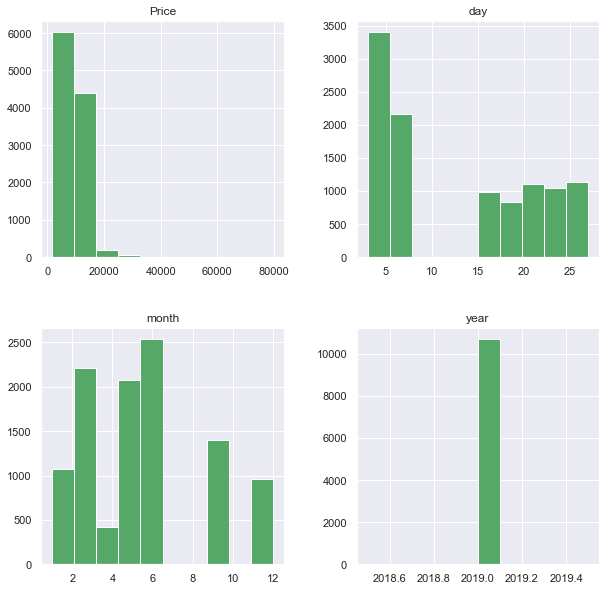

In [25]:
df.hist(figsize=(10,10),color='g')
plt.show()

In [26]:
df_obj.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


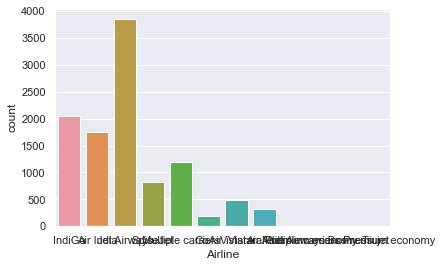

AxesSubplot(0.125,0.125;0.775x0.755)


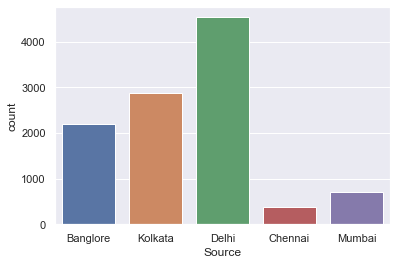

AxesSubplot(0.125,0.125;0.775x0.755)


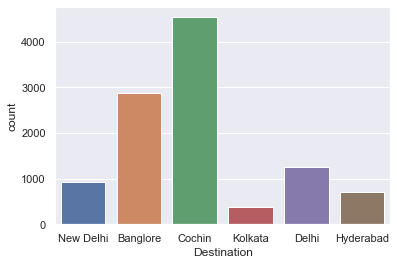

AxesSubplot(0.125,0.125;0.775x0.755)


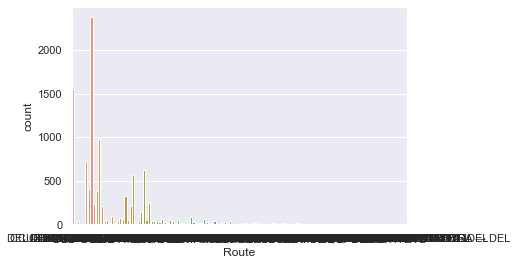

AxesSubplot(0.125,0.125;0.775x0.755)


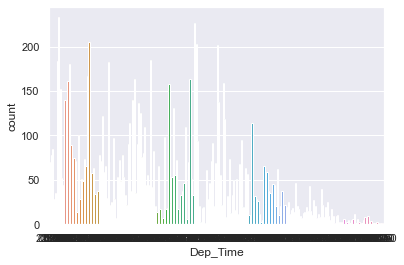

AxesSubplot(0.125,0.125;0.775x0.755)


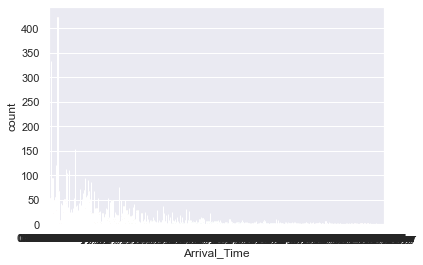

AxesSubplot(0.125,0.125;0.775x0.755)


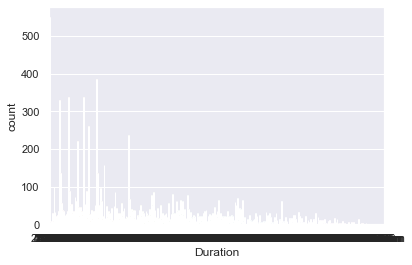

AxesSubplot(0.125,0.125;0.775x0.755)


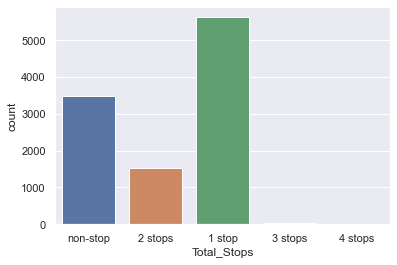

AxesSubplot(0.125,0.125;0.775x0.755)


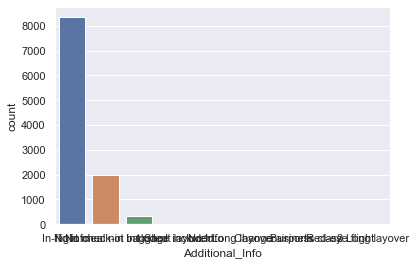

AxesSubplot(0.125,0.125;0.775x0.755)


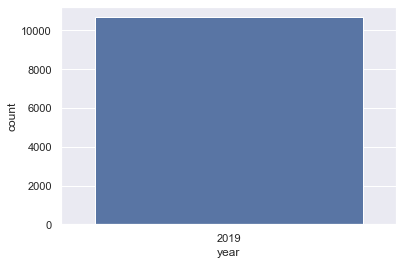

AxesSubplot(0.125,0.125;0.775x0.755)


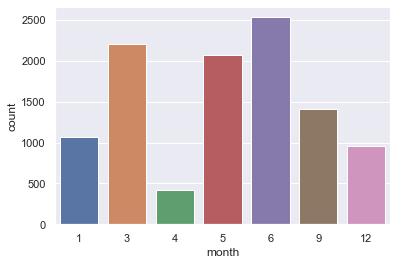

AxesSubplot(0.125,0.125;0.775x0.755)


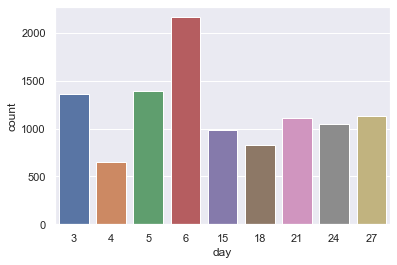

In [27]:
col=['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time','Duration', 'Total_Stops', 'Additional_Info', 'year', 'month', 'day']
    
for i in range(0,12):
    print(sns.countplot(df[col[i]]))
    plt.show()

***Converting our categorical variables***

In [28]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

In [29]:
le.fit(df['Airline'])
y1=le.transform(df['Airline'])
df1=pd.DataFrame(y1,columns =["Airline"])

le.fit(df['Source'])
y1=le.transform(df['Source'])
df2=pd.DataFrame(y1,columns =["Source"])

le.fit(df['Destination'])
y1=le.transform(df['Destination'])
df3=pd.DataFrame(y1,columns =["Destination"])

le.fit(df['Dep_Time'])
y1=le.transform(df['Dep_Time'])
df4=pd.DataFrame(y1,columns =["Dep_Time"])

le.fit(df['Arrival_Time'])
y1=le.transform(df['Arrival_Time'])
df5=pd.DataFrame(y1,columns =["Arrival_Time"])

le.fit(df['Duration'])
y1=le.transform(df['Duration'])
df6=pd.DataFrame(y1,columns =["Duration"])


le.fit(df['Additional_Info'])
y1=le.transform(df['Additional_Info'])
df7=pd.DataFrame(y1,columns =["Additional_Info"])

In [30]:
y_train=df[['Price']]
y_train.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [31]:
x1=df[['day','month']]
x1.head()

,day,month
0,24,3
1,5,1
2,6,9
3,5,12
4,3,1


In [32]:
x_train=pd.concat([df1,df2,df3,df4,df5,df6,df7,x1],axis=1)
x_train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,day,month
0,3,0,5,211,233,240,8,24,3
1,1,3,0,31,906,336,8,5,1
2,4,2,1,70,413,106,8,6,9
3,3,3,0,164,1324,311,8,5,12
4,3,0,5,149,1237,303,8,3,1


***Lets get our testing input set also ready***

In [33]:
x_test['year']= x_test['Date_of_Journey'].dt.year
x_test['month']= x_test['Date_of_Journey'].dt.month
x_test['day']= x_test['Date_of_Journey'].dt.day
x_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,year,month,day
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


In [34]:
le.fit(x_test['Airline'])
y1=le.transform(x_test['Airline'])
df1=pd.DataFrame(y1,columns =["Airline"])

le.fit(x_test['Source'])
y1=le.transform(x_test['Source'])
df2=pd.DataFrame(y1,columns =["Source"])

le.fit(x_test['Destination'])
y1=le.transform(x_test['Destination'])
df3=pd.DataFrame(y1,columns =["Destination"])

le.fit(x_test['Dep_Time'])
y1=le.transform(x_test['Dep_Time'])
df4=pd.DataFrame(y1,columns =["Dep_Time"])

le.fit(x_test['Arrival_Time'])
y1=le.transform(x_test['Arrival_Time'])
df5=pd.DataFrame(y1,columns =["Arrival_Time"])

le.fit(x_test['Duration'])
y1=le.transform(x_test['Duration'])
df6=pd.DataFrame(y1,columns =["Duration"])


le.fit(x_test['Additional_Info'])
y1=le.transform(x_test['Additional_Info'])
df7=pd.DataFrame(y1,columns =["Additional_Info"])

In [35]:
x1=x_test[['day','month']]
x1.head()

,day,month
0,6,6
1,5,12
2,21,5
3,21,5
4,24,6


In [36]:
x_test=pd.concat([df1,df2,df3,df4,df5,df6,df7,x1],axis=1)
x_test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Additional_Info,day,month
0,4,2,1,138,150,10,5,6,6
1,3,3,0,31,353,248,5,5,12
2,4,2,1,156,566,148,3,21,5
3,6,2,1,48,633,36,5,21,5
4,0,0,2,198,135,216,5,24,6


**We have all our input and output set ready with test and train data already split**

<h2>Start of Machine Learning Process</h2>


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=50)

In [39]:
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=3)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=3)
RFR=RandomForestRegressor(random_state=3)
GBR=GradientBoostingRegressor(random_state=3)

In [40]:
models=[]
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [41]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2*100)
    R2_score.append(r2*100)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    print('\n')

*-----------------------------* Lasso *------------------------------*
Lasso()
R2_score =  7.844099189705922
Mean_Squared_Error = 18898696.178844236


*-----------------------------* Ridge *------------------------------*
Ridge()
R2_score =  7.845364249571906
Mean_Squared_Error = 18898436.749096982


*-----------------------------* ElasticNet *------------------------------*
ElasticNet()
R2_score =  7.621529838822028
Mean_Squared_Error = 18944339.165393043


*-----------------------------* DecisionTreeRegressor *------------------------------*
DecisionTreeRegressor(random_state=3)
R2_score =  73.42505432329844
Mean_Squared_Error = 5449806.468140696


*-----------------------------* KNeighborsRegressor *------------------------------*
KNeighborsRegressor()
R2_score =  55.33645791485057
Mean_Squared_Error = 9159290.991857743


*-----------------------------* AdaBoostRegressor *------------------------------*
AdaBoostRegressor(random_state=3)
R2_score =  -4.514010646292266
Mean_Squared_Er

In [42]:
result = pd.DataFrame({'Regression Model': Model, 'R2 Score': R2_score ,'Mean Squared Error' :MSE})
result

,Regression Model,R2 Score,Mean Squared Error
0,Lasso,7.844099,1.889870e+07
1,Ridge,7.845364,1.889844e+07
2,ElasticNet,7.621530,1.894434e+07
3,DecisionTreeRegressor,73.425054,5.449806e+06
4,KNeighborsRegressor,55.336458,9.159291e+06
5,AdaBoostRegressor,-4.514011,2.143301e+07
6,RandomForestRegressor,84.740622,3.129288e+06
7,GradientBoostingRegressor,76.549291,4.809110e+06


RandomForestRegressor is giving good accuracy hence we are going to choose this as our final model

<h1>Now lets save our final model</h1>

In [43]:
import joblib
joblib.dump(RFR,'Flight_Price_Prediction.pkl')

['Flight_Price_Prediction.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">